# HW5, Part 2: PCA

In [1]:
import numpy as np
import os

import matplotlib.pyplot as plt
import scipy.io as sio

## Question 1
I belive, without calculating anything, that the first principle component would be the line $x_1=-2x_0$. All points fall along that line so it would explain all of the sample's variance. Similarly, to answer the next question, I don't think that there would be a second principle commponent. Since all of the points are on the same line the data matrix should have only one non-zero singular value that would, again, explain all of the variance. If you did a full SVD decomposition then the $V$ matrix would have a second vector in it, orthogonal to the first vector, or principle component, but since the associated singular value would be zero I don't think it would count as a principle component. 

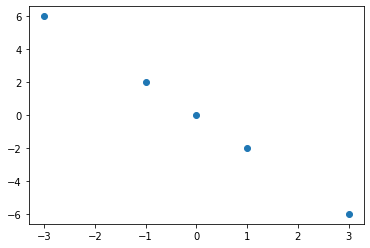

In [2]:
d = np.array([[0,0],[-1,2],[-3,6],[1,-2],[3,-6]])
d.shape
x = d[:,0]
y = d[:,1]
plt.scatter(x, y)
plt.show()

## Question 2
see code, error rates, and images below

In [3]:
# grab the data
mat_fname = os.path.join(os.getcwd(), 'usps.mat')
print("retrieving file from: ",mat_fname)
mat_contents = sio.loadmat(mat_fname)

data = mat_contents['A']
data.shape

retrieving file from:  /Users/annastephens/Source/msu_general/classes/847/hw05/usps.mat


(3000, 256)

In [4]:
# Use PCA to compress data
def pca(X,p):
    X_centered,means = center(X)
    u,s,v = np.linalg.svd(X_centered,compute_uv=True)
    sigma = np.zeros((p,p))
    for i in range(p):
        sigma[i,i]=s[i]
    adjustedData = np.matmul(u[:,:p],sigma)
    pc = v.T[:,:p]
    return(pc,adjustedData,means)
    
def center(X):
    colMeans = np.mean(data,axis=0)
    e = np.ones(X.shape[0])
    meanMatrix = np.outer(colMeans,e).T
    return(X-meanMatrix,colMeans)

def uncenter(X,colMeans):
    e = np.ones(X.shape[0])
    meanMatrix = np.outer(colMeans,e).T
    return(X+meanMatrix)

# reconstruct data after compressing with PCA
def reconstructData(adjustedData,pc,means):
    data = np.matmul(adjustedData,pc.T)
    data = uncenter(data,means)
    return(data)

def getReconstructionError(ogData,newData):
    diff = np.abs(ogData - newData)
    return(np.sum(diff))


# display the image results of various reconstructions
def displayImages(imageNumber,ogData,results):
    plt.figure(figsize=(18,5))

    plt.subplot(1, 5, 1) # row 1, col 2 index 1
    img = np.reshape(data[imageNumber,:],(16,16))
    plt.imshow(img)
    plt.title('original')

    plt.subplot(1, 5, 2) # row 1, col 2 index 1
    img_0 = np.reshape(results[0]['data'][imageNumber,:],(16,16))
    plt.imshow(img_0)
    plt.title("p="+str(results[0]['p']))

    plt.subplot(1, 5, 3) # index 2
    img_1 = np.reshape(results[1]['data'][imageNumber,:],(16,16))
    plt.imshow(img_1)
    plt.title("p="+str(results[1]['p']))

    plt.subplot(1, 5, 4)
    img_2 = np.reshape(results[2]['data'][imageNumber,:],(16,16))
    plt.imshow(img_2)
    plt.title("p="+str(results[2]['p']))

    plt.subplot(1, 5, 5)
    img_3 = np.reshape(results[3]['data'][imageNumber,:],(16,16))
    plt.imshow(img_3)
    plt.title("p="+str(results[3]['p']))

    plt.show()

In [5]:
pVals = [10,50,100,200]
results = []
for p in pVals:
    print('Processing p='+str(p)+'...')
    pc,adjustedData,means = pca(data,p)
    data_reconstructed=reconstructData(adjustedData,pc,means)
    error = getReconstructionError(data,data_reconstructed)
    print('complete, error='+str(error))
    
    r = {'p': p, 'error': error, 'data':data_reconstructed }
    results.append(r)

Processing p=10...
complete, error=242350.45166477285
Processing p=50...
complete, error=125130.77225839514
Processing p=100...
complete, error=74009.0617471119
Processing p=200...
complete, error=18929.843943191023


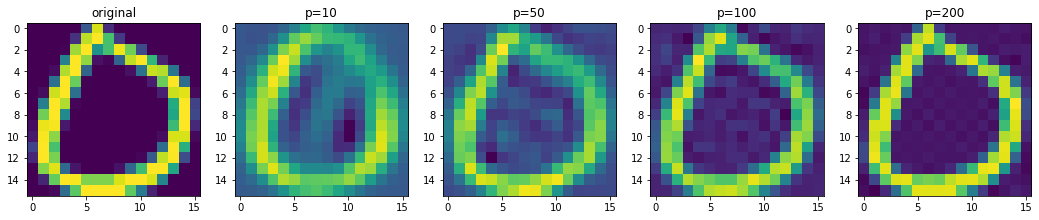

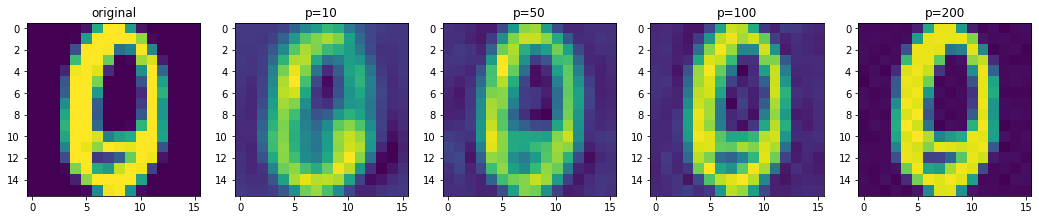

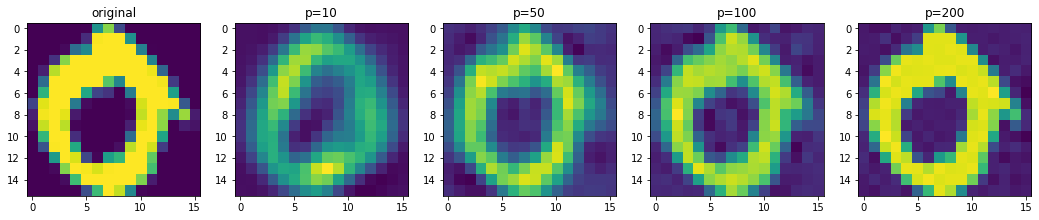

In [6]:
imagesToShow = [0,1,2]
for i in imagesToShow:
    displayImages(i,data,results)